In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
x = data.drop(['AgeCategory', 'Race', 'HeartDisease'], axis=1)
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,Yes,No,No,7.0,0.0,Yes,Male,Yes,No,Fair,6.0,Yes,No,No
319791,29.84,Yes,No,No,0.0,0.0,No,Male,No,Yes,Very good,5.0,Yes,No,No
319792,24.24,No,No,No,0.0,0.0,No,Female,No,Yes,Good,6.0,No,No,No
319793,32.81,No,No,No,0.0,0.0,No,Female,No,No,Good,12.0,No,No,No


In [5]:
y = data['HeartDisease']
y

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object

In [6]:
data_fs = pd.concat([x,y], axis=1)
data_fs

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,Yes,No,No,3.0,30.0,No,Female,Yes,Yes,Very good,5.0,Yes,No,Yes,No
1,20.34,No,No,Yes,0.0,0.0,No,Female,No,Yes,Very good,7.0,No,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,Yes,Yes,Fair,8.0,Yes,No,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,No,No,Good,6.0,No,No,Yes,No
4,23.71,No,No,No,28.0,0.0,Yes,Female,No,Yes,Very good,8.0,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,Yes,No,No,7.0,0.0,Yes,Male,Yes,No,Fair,6.0,Yes,No,No,Yes
319791,29.84,Yes,No,No,0.0,0.0,No,Male,No,Yes,Very good,5.0,Yes,No,No,No
319792,24.24,No,No,No,0.0,0.0,No,Female,No,Yes,Good,6.0,No,No,No,No
319793,32.81,No,No,No,0.0,0.0,No,Female,No,No,Good,12.0,No,No,No,No


In [7]:
le = preprocessing.LabelEncoder()

In [8]:
feature_encode = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in feature_encode:
    data_fs[column] = le.fit_transform(data_fs[column])

In [9]:
data_fs

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,3.0,30.0,0,0,2,1,4,5.0,1,0,1,No
1,20.34,0,0,1,0.0,0.0,0,0,0,1,4,7.0,0,0,0,No
2,26.58,1,0,0,20.0,30.0,0,1,2,1,1,8.0,1,0,0,No
3,24.21,0,0,0,0.0,0.0,0,0,0,0,2,6.0,0,0,1,No
4,23.71,0,0,0,28.0,0.0,1,0,0,1,4,8.0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,2,0,1,6.0,1,0,0,Yes
319791,29.84,1,0,0,0.0,0.0,0,1,0,1,4,5.0,1,0,0,No
319792,24.24,0,0,0,0.0,0.0,0,0,0,1,2,6.0,0,0,0,No
319793,32.81,0,0,0,0.0,0.0,0,0,0,0,2,12.0,0,0,0,No


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

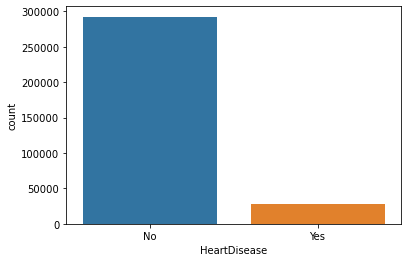

In [10]:
sns.countplot(x=data_fs['HeartDisease'], data=data_fs)

In [11]:
data_yes = data_fs[data_fs['HeartDisease'] == 'Yes']
data_no = data_fs[data_fs['HeartDisease'] == 'No']

In [12]:
num_samples = len(data_yes)
df_no_sampled = data_no.sample(num_samples)

In [13]:
data_balanced = pd.concat([data_yes, df_no_sampled])

In [14]:
data_balanced

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
5,28.87,1,0,0,6.0,0.0,1,0,0,0,1,12.0,0,0,0,Yes
10,34.30,1,0,0,30.0,0.0,1,1,2,0,3,15.0,1,0,0,Yes
35,32.98,1,0,1,10.0,0.0,1,1,2,1,3,4.0,0,0,1,Yes
42,25.06,0,0,0,0.0,0.0,1,0,2,0,2,7.0,0,0,1,Yes
43,30.23,1,0,0,6.0,2.0,1,0,2,1,1,8.0,0,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93717,34.33,1,0,0,0.0,0.0,0,0,0,0,0,8.0,0,0,0,No
3717,37.66,1,0,0,30.0,30.0,0,1,0,0,3,4.0,0,0,0,No
76923,18.75,0,0,0,10.0,0.0,0,1,0,0,4,6.0,0,0,0,No
315074,26.73,0,0,0,0.0,0.0,0,0,0,1,2,7.0,0,0,0,No


In [15]:
data_balanced.duplicated().sum()

2861

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

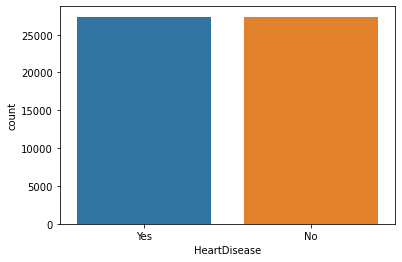

In [16]:
sns.countplot(x = data_balanced['HeartDisease'], data=data_balanced)

In [17]:
data_balanced = data_balanced.sample(frac=1, random_state=42)

In [18]:
data_balanced.isnull().sum()

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
HeartDisease        0
dtype: int64

In [19]:
x = data_balanced.iloc[:, 0:14].values
x

array([[37.93,  1.  ,  0.  , ...,  8.  ,  0.  ,  0.  ],
       [22.86,  0.  ,  0.  , ...,  7.  ,  1.  ,  0.  ],
       [34.3 ,  0.  ,  0.  , ...,  6.  ,  1.  ,  0.  ],
       ...,
       [32.1 ,  0.  ,  0.  , ...,  7.  ,  0.  ,  0.  ],
       [23.49,  1.  ,  0.  , ...,  7.  ,  0.  ,  0.  ],
       [23.06,  0.  ,  0.  , ...,  8.  ,  0.  ,  0.  ]])

In [20]:
y = data_balanced.iloc[:, 14].values
y

array([1, 0, 1, ..., 0, 0, 0])

In [21]:
numeric_features = data[['BMI','Smoking','Sex','Diabetic','KidneyDisease']]

In [22]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 156231 to 183941
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               54746 non-null  float64
 1   Smoking           54746 non-null  int32  
 2   AlcoholDrinking   54746 non-null  int32  
 3   Stroke            54746 non-null  int32  
 4   PhysicalHealth    54746 non-null  float64
 5   MentalHealth      54746 non-null  float64
 6   DiffWalking       54746 non-null  int32  
 7   Sex               54746 non-null  int32  
 8   Diabetic          54746 non-null  int32  
 9   PhysicalActivity  54746 non-null  int32  
 10  GenHealth         54746 non-null  int32  
 11  SleepTime         54746 non-null  float64
 12  Asthma            54746 non-null  int32  
 13  KidneyDisease     54746 non-null  int32  
 14  SkinCancer        54746 non-null  int32  
 15  HeartDisease      54746 non-null  object 
dtypes: float64(4), int32(11), object(1

In [23]:
scaler = StandardScaler()

In [24]:
x = scaler.fit_transform(x)

In [25]:
x

array([[ 1.41104222,  1.01498087, -0.24633556, ...,  0.54532543,
        -0.42904699, -0.29077773],
       [-0.92024836, -0.98524025, -0.24633556, ..., -0.07525756,
         2.33074701, -0.29077773],
       [ 0.84949048, -0.98524025, -0.24633556, ..., -0.69584056,
         2.33074701, -0.29077773],
       ...,
       [ 0.50915609, -0.98524025, -0.24633556, ..., -0.07525756,
        -0.42904699, -0.29077773],
       [-0.82278896,  1.01498087, -0.24633556, ..., -0.07525756,
        -0.42904699, -0.29077773],
       [-0.88930887, -0.98524025, -0.24633556, ...,  0.54532543,
        -0.42904699, -0.29077773]])

In [26]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
def compare_classifiers(x_train, x_test, y_train, y_test):
    classifiers = {
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB(),
        "SVM": SVC(),
        "AdaBoost": AdaBoostClassifier(),
        "Bagging": BaggingClassifier(),
        "Logistic Regression": LogisticRegression()
    }
    
    results = {}
    for classifier_name, classifier in classifiers.items():
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[classifier_name] = accuracy
    
    sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
    
    for classifier_name, accuracy in sorted_results:
        print(f"{classifier_name}: {accuracy}")

In [29]:
compare_classifiers(x_train, x_test, y_train, y_test)

SVM: 0.8631963470319635
AdaBoost: 0.8631050228310503
Logistic Regression: 0.8631050228310503
K-Nearest Neighbors: 0.8464840182648402
Random Forest: 0.8386301369863014
Bagging: 0.8378082191780822
Naive Bayes: 0.809041095890411
Decision Tree: 0.7692237442922374
